# Laboratorio 7: clasificador KNN

### Instrucciones
#### Parte I. 

**Programa y valida el Clasificador de la Distancia Mínima, valídalo con 3 datasets y los siguientes métodos de validación.**

    Hold-Out 70/30 estratificado
    10-Fold Cross-Validation estratificado
    Leave-One-Out.

Elige y justifica el valor más adecuado de K. 

Medidas de desempeño:

    Accuracy
    Matriz de Confusión

### Clase KNN

In [351]:
# Implementación de algorítmo KNN from scratch 

import numpy as np
from collections import Counter 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

class KNN:
    def __init__(self,k=5):
         
        self.k=k
        
    def fit(self, X_train, y_train): 
        self.X_train= X_train
        self.y_train= y_train
        
    def predict(self, X_test): 
        predictions= [self._predict(x) for x in X_test]
        return np.array(predictions)
    
    def _predict(self,x):
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train]
        k_indices= np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def accuracy(self, y_pred, y_test):
        return np.sum(y_pred == y_test) / len(y_test)


    def desempeño(self, y_test,y_pred): 
        print(f"----------------------Desempeño de aplicar KNN con {self.k} vecinos----------------------------")
    
        print("accuracy:", accuracy(y_pred,y_test)) 

        cm= confusion_matrix(y_test, y_pred)
        plt.figure(figsize= (6,6))
        sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',cbar=False)
        plt.title('Confusion Matrix') 
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()


### Clase para métodos de validación

In [352]:
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
import numpy as np

class validacion:
    
    def KFold_10(self, X, y, k, folds=10):
        KF = KFold(n_splits=folds, shuffle=True, random_state=42) 
        accuracies = []
        
        for train_index, test_index in KF.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            knn = KNN(k=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            accuracy = knn.accuracy(y_pred, y_test)
            accuracies.append(accuracy)
        return np.mean(accuracies)      # retorna el promedio de las precisiones obtenidas segun las iteraciones de los cruces 
    
    def KFold_desempeño(self, X, y, k, folds=10):
        # Ejecuta la validación cruzada K-Fold
        print("MÉTODO DE VALIDACIÓN: K FOLDS ")
        self.KFold_10(X, y, k, folds)
        
        # Crea una instancia de KNN para llamar a la función desempeño
        knn = KNN(k=k)
        knn.desempeño(y_test, y_pred)

    def k_optimo(self, X, y, k_values):
        if isinstance(k_values, int):
            k_values = [k_values]

        mejores_precisiones = {}

        for k in k_values:
            precision_promedio = self.KFold_10(X, y, k=k)
            mejores_precisiones[k] = precision_promedio

        valor_optimo = max(mejores_precisiones, key=mejores_precisiones.get)
        print(f"K óptimo: {valor_optimo} con precisión: {mejores_precisiones[valor_optimo]:.4f}")
        return valor_optimo
    



    def HoldOut(self, X, y, k_values):
        # Obtener el mejor valor de k con validación cruzada
        mejor_k = self.k_optimo(X, y, k_values=k_values)
        
        # Dividir los datos usando hold-out (70% entrenamiento, 30% prueba)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        print("MÉTODO DE VALIDACIÓN: HOLD OUT 70-30")
        # Entrenar el modelo con el mejor k
        knn = KNN(k=mejor_k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        knn.desempeño(y_test, y_pred)         
             
    def LeaveOneOut(self, X, y, k_values):
        print("MÉTODO DE VALIDACIÓN: LEAVE ONE OUT ")
        if isinstance(k_values, int):
            k_values = [k_values]
    
        loo = LeaveOneOut()
        mejores_precisiones = {}

        for k in k_values:
            y_preds = []
            for train_index, test_index in loo.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                knn = KNN(k=k)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                y_preds.append(y_pred[0])  

            accuracy = knn.accuracy(np.array(y_preds), y)
            mejores_precisiones[k] = accuracy
    
        valor_optimo = max(mejores_precisiones, key=mejores_precisiones.get)
        print(f"k Optimo con Leave-One-Out: {valor_optimo} con precisión: {mejores_precisiones[valor_optimo]:.4f}")

    # Evaluar el desempeño del modelo con el mejor k
        knn_optimo = KNN(k=valor_optimo)
        knn_optimo.fit(X, y)  # Ajustar el modelo a todos los datos
        y_preds_optimo = knn_optimo.predict(X)  # Predecir sobre el mismo conjunto de datos
        desempeño = knn_optimo.desempeño(y, y_preds_optimo)  # Llamar al método de desempeño




### Iris Dataset

K óptimo: 15 con precisión: 0.9667
MÉTODO DE VALIDACIÓN: HOLD OUT 70-30
----------------------Desempeño de aplicar KNN con 15 vecinos----------------------------
accuracy: 1.0


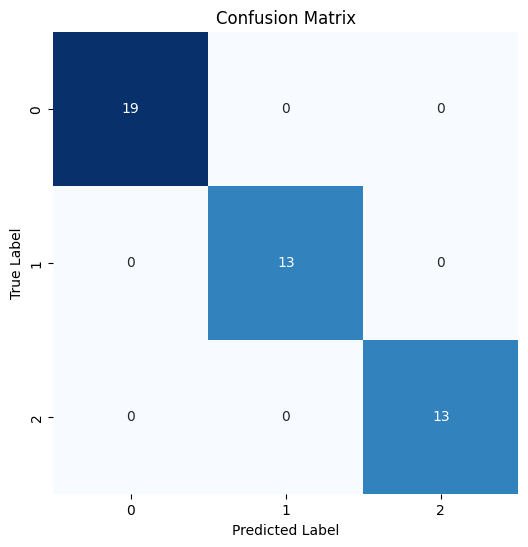

MÉTODO DE VALIDACIÓN: K FOLDS 
----------------------Desempeño de aplicar KNN con 10 vecinos----------------------------
accuracy: 1.0


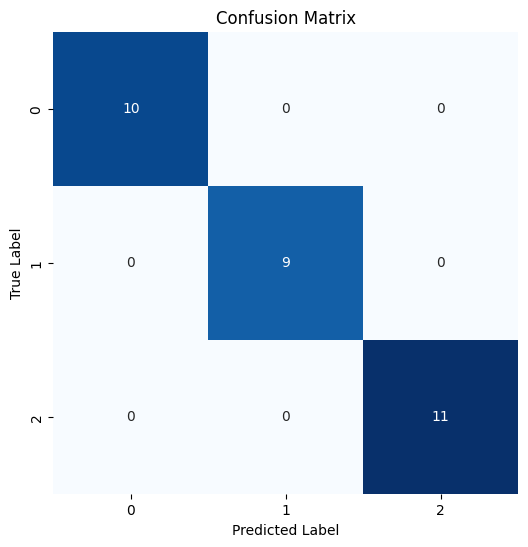

MÉTODO DE VALIDACIÓN: LEAVE ONE OUT 
k Optimo con Leave-One-Out: 15 con precisión: 0.9667
----------------------Desempeño de aplicar KNN con 15 vecinos----------------------------
accuracy: 0.9666666666666667


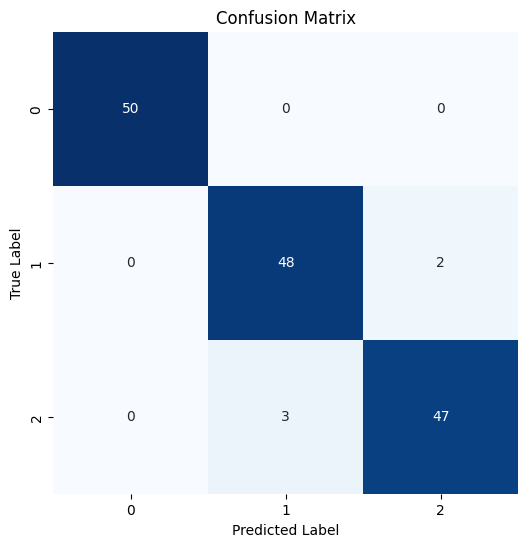

In [353]:
import pandas as pd 
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#preprocesado de datos 
data= load_iris()
X= data.data
y= data.target 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


instancia_algoritmo= validacion()
k_values= 15 


instancia_algoritmo.HoldOut(X_scaled, y,k_values)
instancia_algoritmo.KFold_desempeño(X_scaled, y, 10)
instancia_algoritmo.LeaveOneOut(X_scaled, y,k_values)

### Wine Dataset

K óptimo: 15 con precisión: 0.9611
MÉTODO DE VALIDACIÓN: HOLD OUT 70-30
----------------------Desempeño de aplicar KNN con 15 vecinos----------------------------
accuracy: 0.9629629629629629


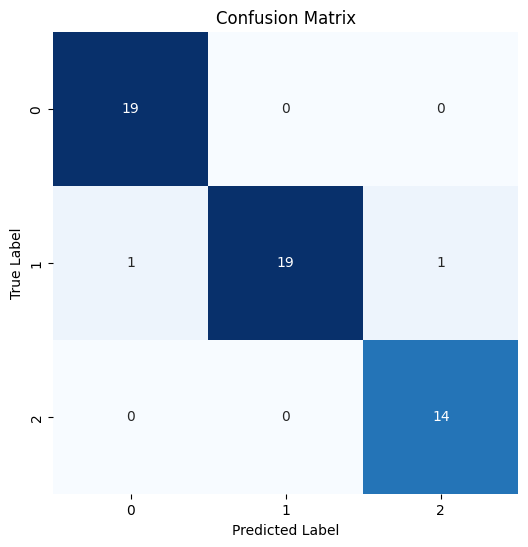

MÉTODO DE VALIDACIÓN: K FOLDS 
----------------------Desempeño de aplicar KNN con 10 vecinos----------------------------
accuracy: 1.0


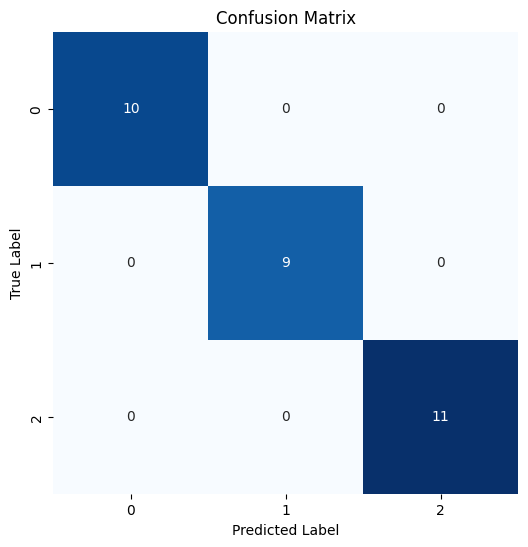

MÉTODO DE VALIDACIÓN: LEAVE ONE OUT 
k Optimo con Leave-One-Out: 15 con precisión: 0.9663
----------------------Desempeño de aplicar KNN con 15 vecinos----------------------------
accuracy: 0.9719101123595506


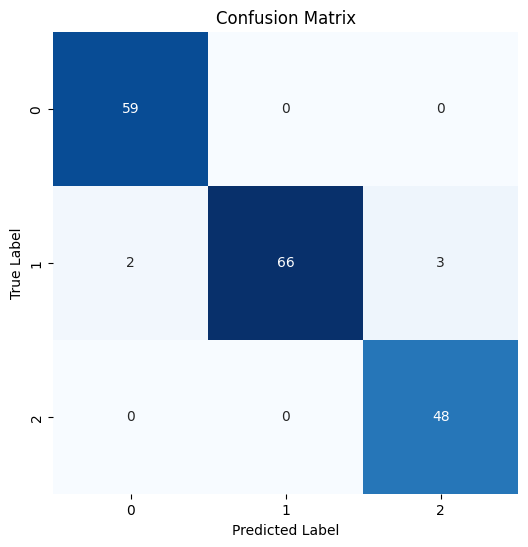

In [354]:
from sklearn.datasets import load_wine


# Preprocesado de datos 
data = load_wine()
X = data.data
y = data.target 

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear una instancia de la clase de validación
instancia_algoritmo = validacion()
k_values = 15 

# Ejecutar métodos de validación
instancia_algoritmo.HoldOut(X_scaled, y, k_values)
instancia_algoritmo.KFold_desempeño(X_scaled, y, 10)
instancia_algoritmo.LeaveOneOut(X_scaled, y, k_values)


### Breast Cancer Dataset

K óptimo: 15 con precisión: 0.9595
MÉTODO DE VALIDACIÓN: HOLD OUT 70-30
----------------------Desempeño de aplicar KNN con 15 vecinos----------------------------
accuracy: 0.9532163742690059


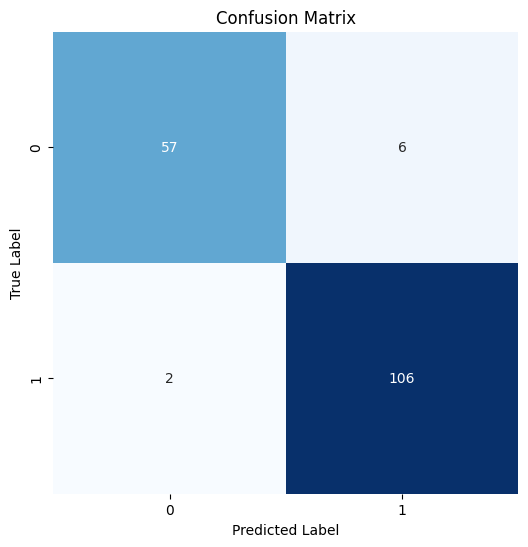

MÉTODO DE VALIDACIÓN: K FOLDS 
----------------------Desempeño de aplicar KNN con 10 vecinos----------------------------
accuracy: 1.0


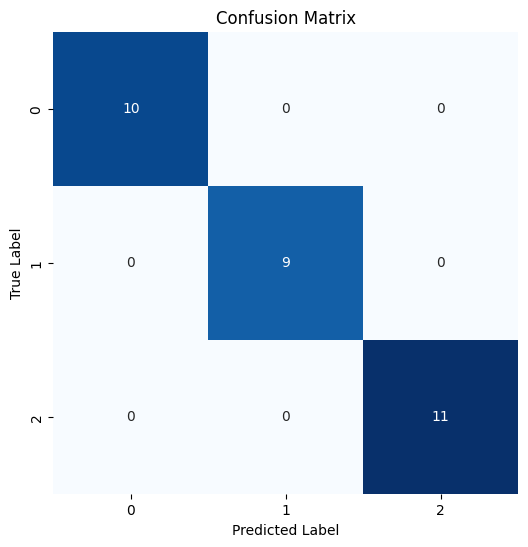

MÉTODO DE VALIDACIÓN: LEAVE ONE OUT 
k Optimo con Leave-One-Out: 15 con precisión: 0.9649
----------------------Desempeño de aplicar KNN con 15 vecinos----------------------------
accuracy: 0.9718804920913884


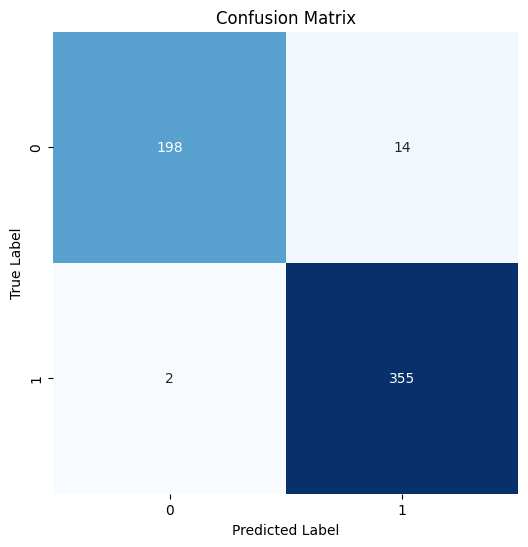

In [355]:
from sklearn.datasets import load_breast_cancer


# Preprocesado de datos 
data = load_breast_cancer()
X = data.data
y = data.target 

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear una instancia de la clase de validación
instancia_algoritmo = validacion()
k_values = 15 

# Ejecutar métodos de validación
instancia_algoritmo.HoldOut(X_scaled, y, k_values)
instancia_algoritmo.KFold_desempeño(X_scaled, y, 10)
instancia_algoritmo.LeaveOneOut(X_scaled, y, k_values)
